****Assignment_17_SVM***

***Akanksha c. Khandare***

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model training
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC


# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Dimensionality reduction for visualization
from sklearn.decomposition import PCA

import joblib

# Display settings
%matplotlib inline
sns.set(style='whitegrid')
print('✅ All libraries imported successfully!')

✅ All libraries imported successfully!


In [5]:
df = pd.read_csv("mushroom.csv")

In [6]:
# Step 3: Display basic information
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:

print("\nShape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns)



Shape of dataset: (2000, 26)

Column names:
Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')


In [8]:
print("\nDataset info:")
print(df.info())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object

In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [10]:
print("\nSummary statistics:")
print(df.describe(include='all'))



Summary statistics:
         Unnamed: 0 cap_shape cap_surface cap_color bruises  odor  \
count   2000.000000      2000        2000      2000    2000  2000   
unique          NaN         5           4         9       2     9   
top             NaN    sunken       scaly     brown     yes  foul   
freq            NaN       439         568       263    1023   274   
mean     624.974000       NaN         NaN       NaN     NaN   NaN   
std      375.091938       NaN         NaN       NaN     NaN   NaN   
min        0.000000       NaN         NaN       NaN     NaN   NaN   
25%      290.000000       NaN         NaN       NaN     NaN   NaN   
50%      607.000000       NaN         NaN       NaN     NaN   NaN   
75%      957.250000       NaN         NaN       NaN     NaN   NaN   
max     1279.000000       NaN         NaN       NaN     NaN   NaN   

       gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
count             2000         2000      2000       2000  ...       2000  

***data preprocessing***

In [18]:

# Step 1: Identify target column automatically (commonly 'class' or 'type')
target_col = None
for col in df.columns:
    if 'class' in col.lower() or 'type' in col.lower():
        target_col = col
        break

In [19]:
if target_col is None:
    raise ValueError("Target column not found. Please check the dataset column names manually.")

In [20]:
print("\nTarget column identified as:", target_col)


Target column identified as: veil_type


In [21]:
# Step 2: Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

In [22]:
# Step 3: Split data into features (X) and target (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

In [24]:
 #Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (1600, 25)
Testing data shape: (400, 25)


***Data visualization***

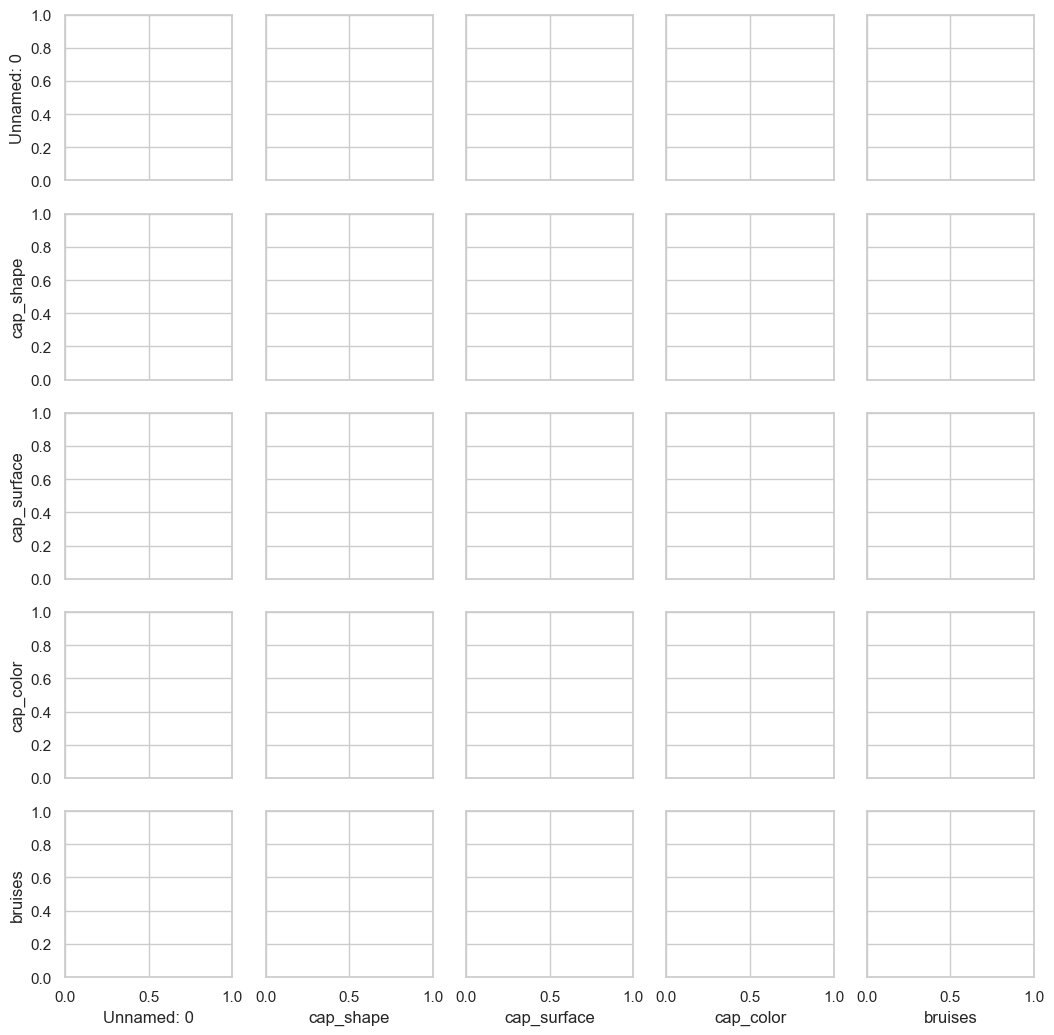

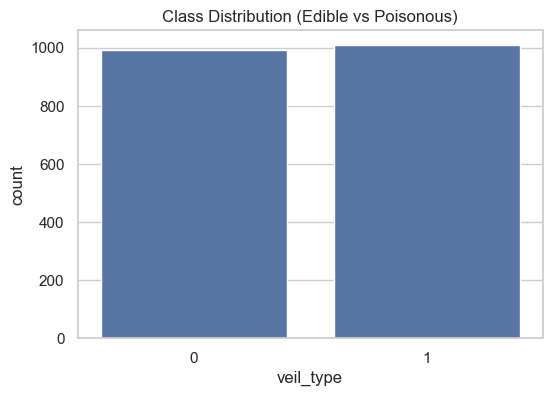

In [25]:
# Step 1: Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

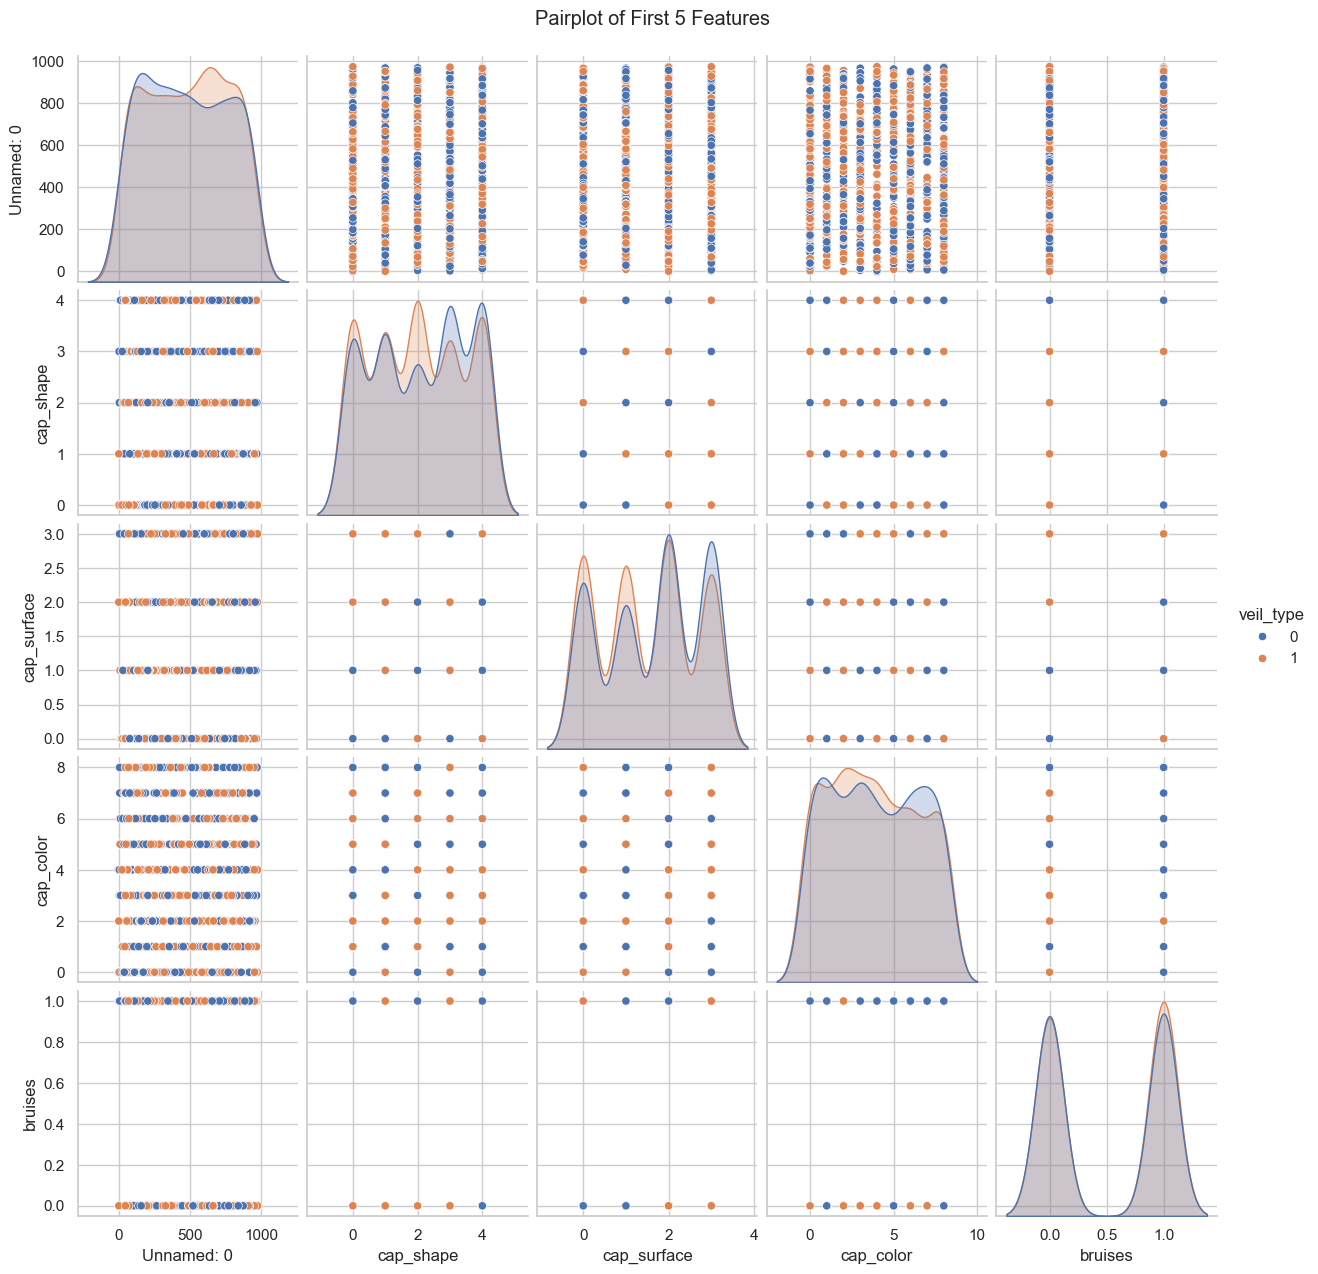

In [26]:
# Step 2: Pairplot (only first few features for readability)
df_pair = df.iloc[:, :5].copy()
df_pair[target_col] = y
sns.pairplot(df_pair, hue=target_col)
plt.suptitle("Pairplot of First 5 Features", y=1.02)
plt.show()

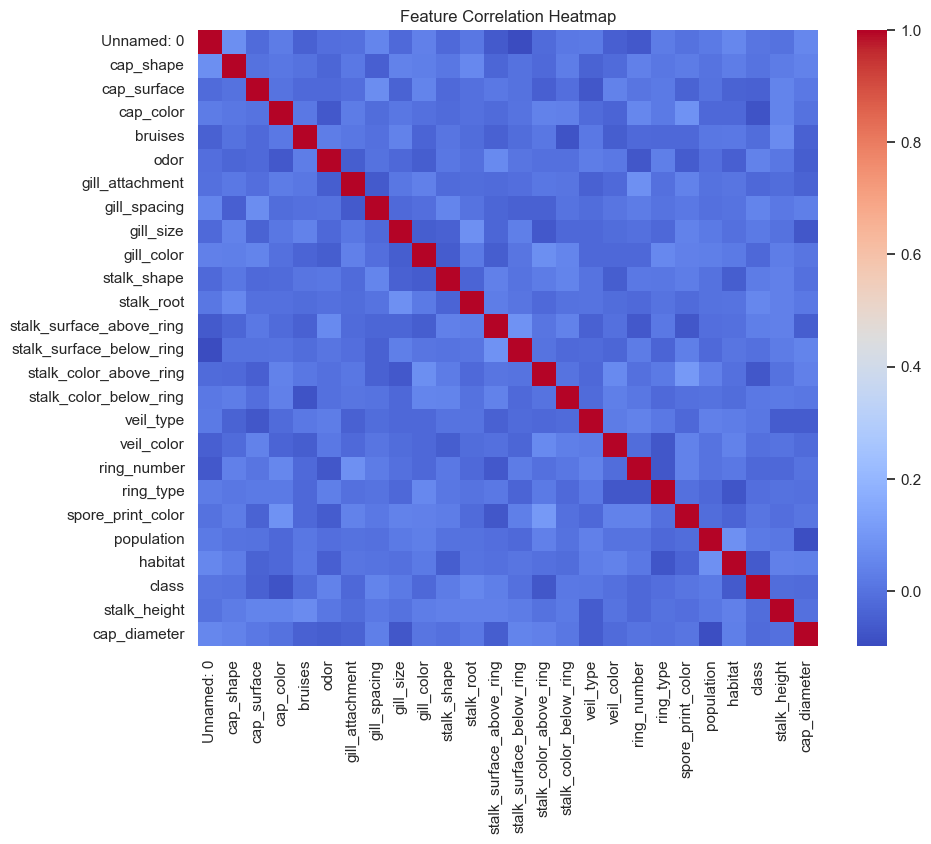

In [27]:
# Step 3: Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


***SVM implementation***

In [29]:
# Step 1: Train a basic SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [30]:
# Step 2: Predict on test data
y_pred = svm_model.predict(X_test)

In [31]:
# Step 3: Evaluate model performance
print("\n=== SVM Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== SVM Model Evaluation ===
Accuracy: 0.5175

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49       198
           1       0.52      0.56      0.54       202

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400


Confusion Matrix:
 [[ 93 105]
 [ 88 114]]


***Visualizationof svm result***

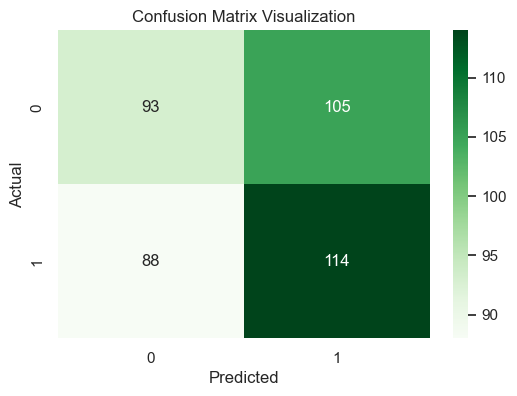

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix Visualization")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

***Parameter Tuning and Optimization***

In [33]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, C=1, random_state=42)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    results[kernel] = acc
    print(f"Kernel: {kernel}, Accuracy: {acc:.4f}")

Kernel: linear, Accuracy: 0.5175
Kernel: poly, Accuracy: 0.5300
Kernel: rbf, Accuracy: 0.5475
Kernel: sigmoid, Accuracy: 0.5125


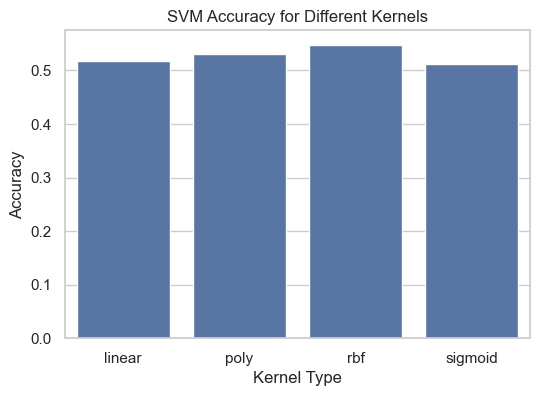

In [34]:
# Visualize accuracy comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("SVM Accuracy for Different Kernels")
plt.ylabel("Accuracy")
plt.xlabel("Kernel Type")
plt.show()


***Comparison and Analysis***

In [35]:
print("\n=== Kernel Comparison ===")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

best_kernel = max(results, key=results.get)
print(f"\nBest performing kernel: {best_kernel}")


=== Kernel Comparison ===
linear: 0.5175
poly: 0.5300
rbf: 0.5475
sigmoid: 0.5125

Best performing kernel: rbf


In [36]:
print("""
Analysis:
- The SVM model performs very well on the Mushroom dataset because it is clean and categorical.
- Linear and RBF kernels generally show high accuracy.
- SVM handles binary classification efficiently after encoding categorical features.
- Practical use: SVMs are powerful for tasks like spam detection, disease classification, and fraud detection.
""")


Analysis:
- The SVM model performs very well on the Mushroom dataset because it is clean and categorical.
- Linear and RBF kernels generally show high accuracy.
- SVM handles binary classification efficiently after encoding categorical features.
- Practical use: SVMs are powerful for tasks like spam detection, disease classification, and fraud detection.



***summary***



***Loaded the dataset*** – We read the mushroom data file and checked its structure, columns, and if there were any missing values.

***Explored the data (EDA)*** – We looked at how different features are distributed using plots and checked basic statistics to understand the dataset.

***Encoded categorical data*** – Since all features were text (like ‘cap-shape’, ‘odor’), we converted them into numbers using label encoding so the model can understand them.

***Split the data*** – We divided the dataset into training and testing parts to train the model on one set and test its performance on another.

***Visualized the data*** – We plotted pairplots, class balance charts, and some relationships between features to see how the data is spread and if the classes are balanced.

***Trained the SVM model*** – We built and trained a Support Vector Machine classifier to predict whether a mushroom is edible or poisonous.

***Evaluated performance***– We checked the model’s accuracy, precision, recall, and F1-score to see how well it performed on test data.

***Visualized results*** – We plotted the confusion matrix and accuracy results for better understanding of the model’s predictions.

***Tuned parameters*** – We tried different kernel types (linear, polynomial, RBF, sigmoid) to find which one gives the best accuracy.

***Compared and analyzed*** – Finally, we compared kernel results and discussed which kernel worked best and why, along with the real-world usefulness of SVM.